In [0]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import time
import matplotlib.pyplot as plt
import numpy as np
tf.__version__
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tfe.enable_eager_execution()
tfe.executing_eagerly()


True

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Loss at step 000: 2.577
Loss at step 500: 2.272
Loss at step 1000: 1.975
Loss at step 1500: 1.686
Loss at step 2000: 1.412
Loss at step 2500: 1.161
Loss at step 3000: 0.941
Loss at step 3500: 0.763
Loss at step 4000: 0.631
Loss at step 4500: 0.543
Loss at step 5000: 0.491
Loss at step 5500: 0.461
Loss at step 6000: 0.445
Loss at step 6500: 0.436
Loss at step 7000: 0.431
Loss at step 7500: 0.428
Loss at step 8000: 0.427
Loss at step 8500: 0.426
Loss at step 9000: 0.426
Loss at step 9500: 0.426
W : 2.962291717529297 , b = 2.0037057399749756 
tf.Tensor(0.42565772, shape=(), dtype=float32)


<function matplotlib.pyplot.show>

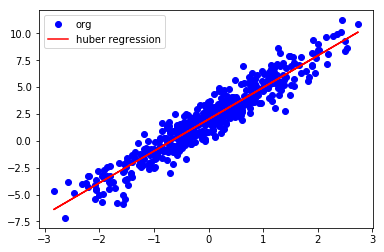

In [0]:
# Create data
NUM_EXAMPLES = 500

#define inputs and outputs with some noise 
X = tf.random_normal([NUM_EXAMPLES])  #inputs 
noise = tf.random_normal([NUM_EXAMPLES]) #noise 
y = X * 3 + 2 + noise  #true output

# Create variables.
W = None
b = None


train_steps = 10000
learning_rate = 0.001
W = tf.Variable(0.)
b = tf.Variable(0.)
# Define the linear predictor.
def prediction(x):
  yhat = X * W + b
  return yhat

# Define loss functions of the form: L(y, y_predicted)
def squared_loss(y, y_predicted):
  error = y_predicted - y
  loss = tf.reduce_mean(tf.square(error))
  return loss
# def huber_loss(y, y_predicted, m=1.0):
#   error = y_predicted - y
#   """Huber loss."""
#   loss= tf.reduce_mean(tf.convert_to_tensor([((1/2)*(tf.square(err))) if (tf.math.abs(err)) <=(m) else (m*(tf.math.abs(err))-(1/2)*m*m) for err in error]))
#   return loss
def huber_loss(y,y_predicted, m=1.0):
    error = tf.math.abs(y_predicted - y)
    flag = (error > m)
    loss=(tf.reduce_sum(0.5 * tf.square(tf.boolean_mask( ((error)),(~flag)))) -tf.reduce_sum( m * (0.5 * m -(tf.boolean_mask(error,(flag)  )))))/len(error)
    return loss
def Pseudo_huber_loss(y, y_predicted, m=1.0): #this is the hybrid-strongly_convex L1L2 norm form of huber loss
  error =tf.math.abs(y_predicted - y)
  loss = tf.reduce_mean(m*m*(tf.sqrt(1+(error/m)**2)-1))
  return loss
# for i in range(train_steps):
#   ##TO DO ## Calculate gradients
#   with tf.GradientTape() as tape:
#     dW, db = tape.gradient(squared_loss(y,prediction(X)), [W, b])
#     W.assign_sub(dW * learning_rate)
#     b.assign_sub(db* learning_rate)
#     if i % 500 == 0:
#         print("Loss at step {:03d}: {:.3f}".format(i, squared_loss(y,prediction(X))))
# print(f'W : {W.numpy()} , b = {b.numpy()} ')
# for i in range(train_steps):
#   ###TO DO ## Calculate gradients
#   with tf.GradientTape() as tape:
#     dW, db = tape.gradient(huber_loss(y,prediction(X)), [W, b])
#     W.assign_sub(dW * learning_rate)
#     b.assign_sub(db* learning_rate)
#     if i % 500 == 0:
#       print("Loss at step {:03d}: {:.3f}".format(i, huber_loss(y,prediction(X))))
# print(f'W : {W.numpy()} , b = {b.numpy()} ')

for i in range(train_steps):
  ###TO DO ## Calculate gradients
  with tf.GradientTape() as tape:
    dW, db = tape.gradient(tf.losses.huber_loss(y,prediction(X)), [W, b])
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db* learning_rate)
    if i % 500 == 0:
      print("Loss at step {:03d}: {:.3f}".format(i, tf.losses.huber_loss(y,prediction(X))))
print(f'W : {W.numpy()} , b = {b.numpy()} ')
print(tf.losses.huber_loss(y,prediction(X)))

# for i in range(train_steps):
#   ###TO DO ## Calculate gradients
#   with tf.GradientTape() as tape:
#     dW, db = tape.gradient(Pseudo_huber_loss(y,prediction(X)), [W, b])
#     W.assign_sub(dW * learning_rate)
#     b.assign_sub(db* learning_rate)
#     if i % 500 == 0:
#       print("Loss at step {:03d}: {:.3f}".format(i, Pseudo_huber_loss(y,prediction(X))))
# print(f'W : {W.numpy()} , b = {b.numpy()} ')

plt.plot(X, y, 'bo',label='org')
plt.plot(X, X * W.numpy() + b.numpy(), 'r',
         label="huber regression")
plt.legend()
plt.show